<a href="https://colab.research.google.com/github/kridtapon/BandRSI-Momentum/blob/main/BandRSI_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.4/527.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninst

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import matplotlib.pyplot as plt

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20, std_dev=2):
    """Calculate Bollinger Bands."""
    df['Mean'] = df['Close'].rolling(window=window).mean()
    df['Std'] = df['Close'].rolling(window=window).std()
    df['Upper_Band'] = df['Mean'] + (std_dev * df['Std'])
    df['Lower_Band'] = df['Mean'] - (std_dev * df['Std'])
    return df

# Function to calculate RSI
def calculate_rsi(df, period=14):
    """Calculate Relative Strength Index (RSI)."""
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

# Define the stock symbol and time period
symbol = 'INTC'
start_date = '2014-01-01'
end_date = '2024-12-27'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate Bollinger Bands and RSI
df = calculate_bollinger_bands(df, window=48, std_dev=1)
df = calculate_rsi(df, period=29)

# Define entry and exit signals
df['Buy_Signal'] = (df['Close'] < df['Lower_Band']) & (df['RSI'] < 30)
df['Sell_Signal'] = (df['Close'] > df['Upper_Band']) & (df['RSI'] > 70)
df['Exit_Buy'] = (df['Close'] > df['Mean'])  # Exit long when price returns to the mean
df['Exit_Sell'] = (df['Close'] < df['Mean'])  # Exit short when price returns to the mean

# Convert signals to boolean arrays
entries = df['Buy_Signal'].to_numpy()
exits = df['Exit_Buy'].to_numpy()

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=entries,
    exits=exits,
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2014-01-02 00:00:00
End                           2024-12-26 00:00:00
Period                                       2765
Start Value                              100000.0
End Value                           240623.637702
Total Return [%]                       140.623638
Benchmark Return [%]                   -20.744475
Max Gross Exposure [%]                      100.0
Total Fees Paid                       4469.975977
Max Drawdown [%]                        22.458192
Max Drawdown Duration                       176.0
Total Trades                                   14
Total Closed Trades                            13
Total Open Trades                               1
Open Trade PnL                       16021.261354
Win Rate [%]                            76.923077
Best Trade [%]                           28.07648
Worst Trade [%]                        -11.518582
Avg Winning Trade [%]                   11.330594
Avg Losing Trade [%]                    -7.739801


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: 

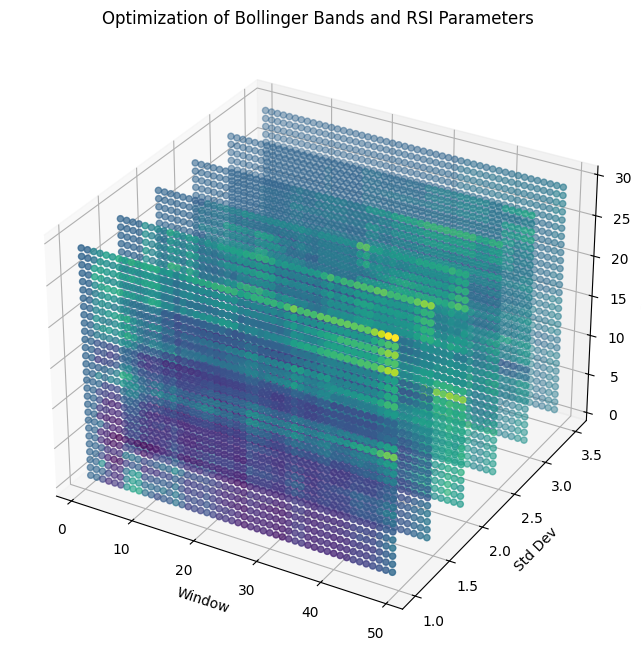

Best Parameters:
Window: 48.0
Std Dev: 1.0
Period: 29.0
Final Portfolio Value: 140.6236377023705


In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20, std_dev=2):
    """Calculate Bollinger Bands."""
    df['Mean'] = df['Close'].rolling(window=window).mean()
    df['Std'] = df['Close'].rolling(window=window).std()
    df['Upper_Band'] = df['Mean'] + (std_dev * df['Std'])
    df['Lower_Band'] = df['Mean'] - (std_dev * df['Std'])
    return df

# Function to calculate RSI
def calculate_rsi(df, period=14):
    """Calculate Relative Strength Index (RSI)."""
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

# Define the stock symbol and time period
symbol = 'INTC'
start_date = '2014-01-01'
end_date = '2024-12-27'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Initialize arrays to store results
results = []
window_range = range(1, 50)   # Example range for window
std_dev_range = np.arange(1, 4, 0.5)  # Example range for std_dev
period_range = range(1, 30)   # Example range for period

# Loop through all combinations of window, std_dev, and period
for window in window_range:
    for std_dev in std_dev_range:
        for period in period_range:
            # Calculate Bollinger Bands and RSI for current parameter set
            temp_df = df.copy()
            temp_df = calculate_bollinger_bands(temp_df, window=window, std_dev=std_dev)
            temp_df = calculate_rsi(temp_df, period=period)

            # Define entry and exit signals
            temp_df['Buy_Signal'] = (temp_df['Close'] < temp_df['Lower_Band']) & (temp_df['RSI'] < 30)
            temp_df['Sell_Signal'] = (temp_df['Close'] > temp_df['Upper_Band']) & (temp_df['RSI'] > 70)
            temp_df['Exit_Buy'] = (temp_df['Close'] > temp_df['Mean'])
            temp_df['Exit_Sell'] = (temp_df['Close'] < temp_df['Mean'])

            # Convert signals to boolean arrays
            entries = temp_df['Buy_Signal'].to_numpy()
            exits = temp_df['Exit_Buy'].to_numpy()

            # Backtest using vectorbt
            portfolio = vbt.Portfolio.from_signals(
                close=temp_df['Close'],
                entries=entries,
                exits=exits,
                init_cash=100_000,
                fees=0.001
            )

            # Store results (final portfolio value, can also include Sharpe ratio or other metrics)
            results.append((window, std_dev, period, portfolio.stats().loc['Total Return [%]']))

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results, columns=['Window', 'Std_Dev', 'Period', 'Total Return [%]'])

# Extract data for 3D plotting
x = results_df['Window']
y = results_df['Std_Dev']
z = results_df['Period']
value = results_df['Total Return [%]']

# Create a 3D plot of the optimization results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=value, cmap='viridis', marker='o')
ax.set_xlabel('Window')
ax.set_ylabel('Std Dev')
ax.set_zlabel('Period')
ax.set_title('Optimization of Bollinger Bands and RSI Parameters')
plt.show()

# Find the best parameter combination (highest final portfolio value)
best_params = results_df.loc[results_df['Total Return [%]'].idxmax()]

# Print the best parameters and corresponding final portfolio value
print(f"Best Parameters:")
print(f"Window: {best_params['Window']}")
print(f"Std Dev: {best_params['Std_Dev']}")
print(f"Period: {best_params['Period']}")
print(f"Final Portfolio Value: {best_params['Total Return [%]']}")
